In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv.euler_solver import EulerSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

In [2]:
N = 32
p = 3

sims = []
for flux_recipe in [1, 2, 3]:
    for lazy_primitives in [False, True]:
        sim = EulerSolver(
            ic=ic.sod_shock_tube_1d,
            bcx="free",
            nx=N,
            p=p,
            flux_recipe=flux_recipe,
            MOOD=True,
            max_MOOD_iters=1,
            limiting_vars="actives",
            NAD=True,
            NAD_atol=0.0,
            NAD_rtol=1e-5,
            PAD={"rho": (0, np.inf), "P": (0, np.inf)},
            lazy_primitives=lazy_primitives,
        )
        sim.run(0.245)

        sims.append(
            {"sim": sim, "flux_recipe": flux_recipe, "lazy_primitives": lazy_primitives}
        )

100%|██████████| 0.245/0.245 [00:00]               
100%|██████████| 0.245/0.245 [00:00]               
100%|██████████| 0.245/0.245 [00:00]               
100%|██████████| 0.245/0.245 [00:00]               
100%|██████████| 0.245/0.245 [00:00]               
100%|██████████| 0.245/0.245 [00:00]               


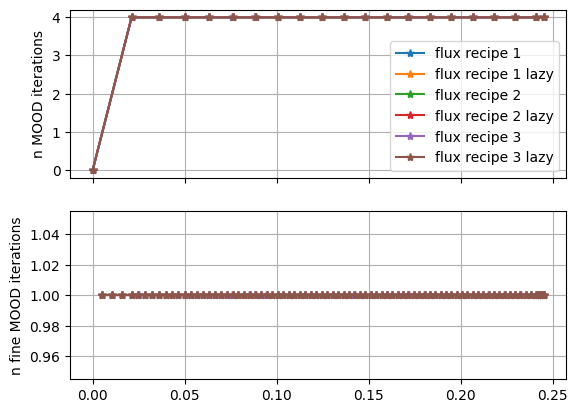

In [3]:
fig, axs = plt.subplots(2, 1, sharex=True)

axs[0].set_ylabel("n MOOD iterations")
axs[1].set_ylabel("n fine MOOD iterations")

for entry in sims:
    sim = entry["sim"]
    flux_recipe = entry["flux_recipe"]
    lazy_primitives = entry["lazy_primitives"]

    vis.plot_timeseries(
        sim,
        axs[0],
        "n_MOOD_iters",
        label=f"flux recipe {flux_recipe}" + (" lazy" if lazy_primitives else ""),
        marker="*",
    )

    vis.plot_timeseries(
        sim,
        axs[1],
        "nfine_MOOD_iters",
        label=f"flux recipe {flux_recipe}" + (" lazy" if lazy_primitives else ""),
        marker="*",
    )


axs[0].grid()
axs[1].grid()
axs[0].legend()

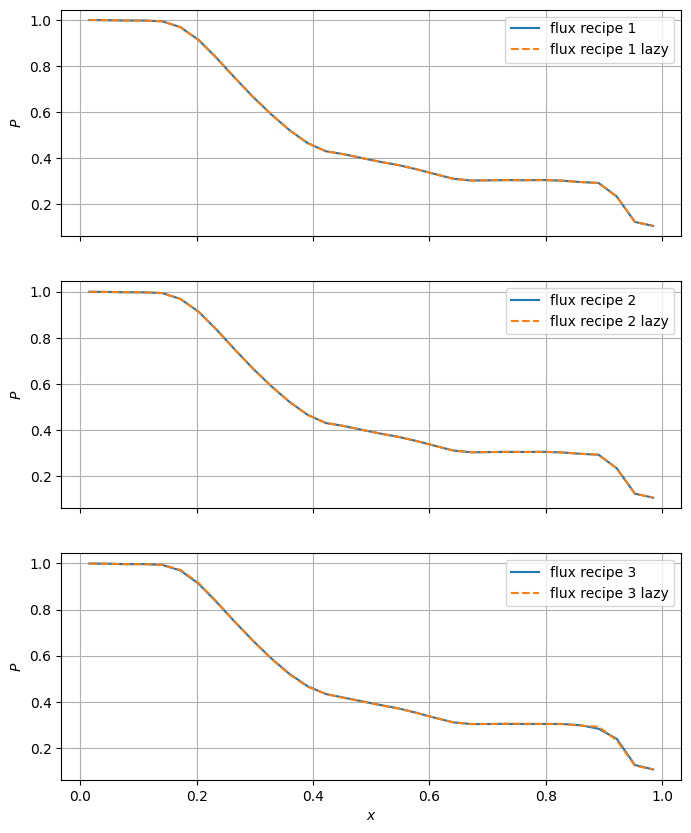

In [9]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8, 10))

axs[0].set_ylabel(r"$\rho$")
axs[1].set_ylabel(r"$v_x$")
axs[2].set_ylabel(r"$P$")
axs[2].set_xlabel(r"$x$")

for entry in sims:
    sim = entry["sim"]
    flux_recipe = entry["flux_recipe"]
    lazy_primitives = entry["lazy_primitives"]

    vis.plot_1d_slice(
        entry["sim"],
        axs[flux_recipe - 1],
        "P",
        x=None,
        label=f"flux recipe {entry['flux_recipe']}"
        + (" lazy" if lazy_primitives else ""),
        linestyle="--" if lazy_primitives else "-",
    )

for i in range(3):
    axs[i].legend()
    axs[i].grid()
    axs[i].set_ylabel(r"$P$")